# piece-wise linear regression
- toc:true
- branch: master
- badges: true
- comments: true
- editor : 이강철
- hide : false
- published : true

$$y= x+ 0.3 \varepsilon \quad x \leq 0$$

$$y =  3.5x + 0.3\varepsilon \quad x>0$$

In [ ]:
import tensorflow as tf
import tensorflow.experimental.numpy as tnp
import matplotlib.pyplot as plt
tnp.experimental_enable_numpy_behavior()

In [ ]:
tnp.random.seed(202150256)

N = 100

x = tnp.linspace(-1,1,N)

lamb  = lambda x : x + tnp.random.randn()*0.3 if x<=0 else 3.5*x + tnp.random.randn()*0.3

y = tnp.array(list(map(lamb,x)))

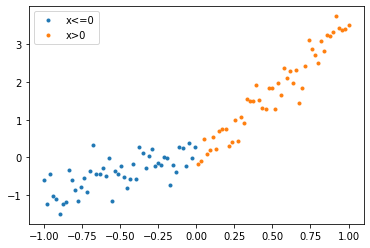

In [ ]:
plt.plot(x[x<=0],y[x<=0],".")
plt.plot(x[x>0],y[x>0],".")
plt.legend(["x<=0","x>0"])

## 풀이 1 : 단순선형회귀(잘 적합 x)

In [ ]:
x = x.reshape(N,1)
y = y.reshape(N,1)

In [ ]:
net = tf.keras.Sequential()
layer = tf.keras.layers.Dense(1,use_bias=True)
net.add(layer)

net.compile(tf.optimizers.SGD(0.1),loss="mse")
net.fit(x,y,epochs=1000,verbose=0,batch_size=N)

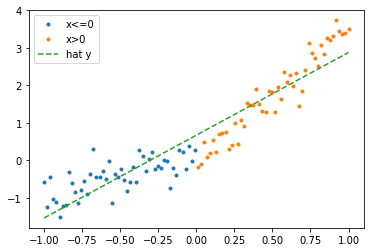

In [ ]:
plt.plot(x[x<=0],y[x<=0],".")
plt.plot(x[x>0],y[x>0],".")
plt.plot(x,net(x),"--")
plt.legend(["x<=0","x>0","hat y"])

* 절단점을 고려하지 않고 단순선형회귀를 적합시켰기 때문에 에포크를 백만번 돌려도 잘적합되지 않을 것임

## 풀이 2: 비선형활성화함수의 도입

In [ ]:
net2 = tf.keras.Sequential()
l1 = tf.keras.layers.Dense(1,use_bias=True,input_shape=(1,))
a1 = tf.keras.layers.Activation(tf.nn.relu)
net2.add(l1)
net2.add(a1)

In [ ]:
l1.get_weights()

[array([[0.06800056]], dtype=float32), array([0.], dtype=float32)]

* 데이터 형태에 따라 가중치 초깃값 할당이 중요!!

In [ ]:
net2.compile(tf.optimizers.SGD(0.1),loss="mse")
net2.fit(x,y,epochs=1000,verbose=0,batch_size=N)

### 중간단계 확인

#### 선형변환 

In [ ]:
linear = l1(x)

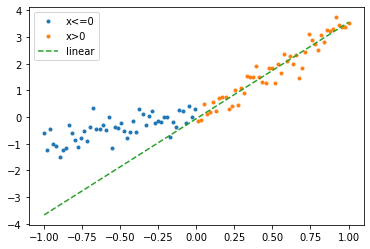

In [ ]:
plt.plot(x[x<=0],y[x<=0],".")
plt.plot(x[x>0],y[x>0],".")
plt.plot(x,linear,"--")
plt.legend(["x<=0","x>0","linear"])

#### 비선형활성화함수 추가

In [ ]:
relu_x = a1(l1(x))

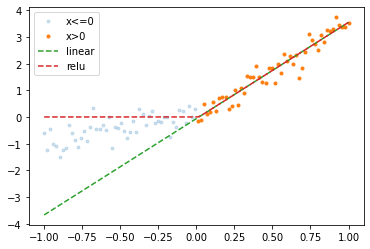

In [ ]:
plt.plot(x[x<=0],y[x<=0],".",alpha=0.2)
plt.plot(x[x>0],y[x>0],".")
plt.plot(x,linear,"--")
plt.plot(x,relu_x,"--")
plt.legend(["x<=0","x>0","linear","relu"])

* 출력층에서의 함수가 `identity`이기 때문에 `relu_x == net2(x)` 이다.



In [ ]:
net2.weights

[<tf.Variable 'dense_49/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[3.6102903]], dtype=float32)>,
 <tf.Variable 'dense_49/bias:0' shape=(1,) dtype=float32, numpy=array([-0.06231225], dtype=float32)>]

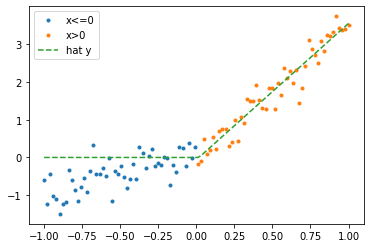

In [ ]:
plt.plot(x[x<=0],y[x<=0],".")
plt.plot(x[x>0],y[x>0],".")
plt.plot(x,net2(x),"--")
plt.legend(["x<=0","x>0","hat y"])

* 그러나 여전히 **0이하는** 잘 예측하지 못함. 음수 값은 전부다 0으로 맞추기 때문

* 즉, 여전히 과소적합을 벗어나지 못한다.

## 풀이 3:  노드 수 추가

* 선형변환이 되는 노드에서 출력층을 두 개로 한 후 다시 최종 출력층에서는 하나로 합치면??

* 즉 처음노드에선 출력층을 2개로, 그리고 relu를 적용한 후 다시 하나의 출력층으로 선형결합한다!!

In [ ]:
net3 = tf.keras.Sequential()
l1 = tf.keras.layers.Dense(2, input_shape=(1,),use_bias=True)
a1 = tf.keras.layers.Activation(tf.nn.relu)
l2 = tf.keras.layers.Dense(1,input_shape=(2,),use_bias=True)

net3.add(l1)
net3.add(a1)
net3.add(l2)

In [ ]:
net3.compile(tf.optimizers.SGD(0.1),loss="mse")
net3.fit(x,y, epochs = 1000,verbose=0,batch_size=N)

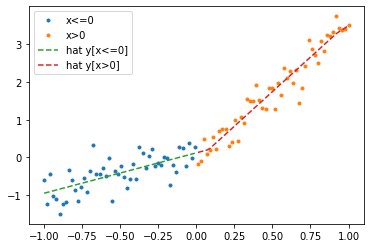

In [ ]:
plt.plot(x[x<=0],y[x<=0],".")
plt.plot(x[x>0],y[x>0],".")
plt.plot(x[x<=0],net3(x)[x<=0],"--")
plt.plot(x[x>0],net3(x)[x>0],"--")
plt.legend(["x<=0","x>0","hat y[x<=0]","hat y[x>0]"])

In [ ]:
net3.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 2)                 4         
                                                                 
 activation_21 (Activation)  (None, 2)                 0         
                                                                 
 dense_25 (Dense)            (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


## 풀이 4 : 노드의 개수 many

In [ ]:
net4 =tf.keras.Sequential()
layer = tf.keras.layers.Dense(256,activation = "relu",use_bias=True)
l2 = tf.keras.layers.Dense(1, input_shape=(256,),use_bias=True)
net4.add(layer)
net4.add(l2)
net4.compile(tf.optimizers.SGD(0.1),loss="mse")
net4.fit(x,y,epochs=1000,verbose=0,batch_size=N)

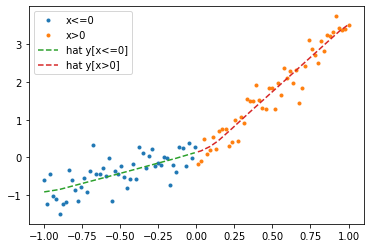

In [ ]:
plt.plot(x[x<=0],y[x<=0],".")
plt.plot(x[x>0],y[x>0],".")
plt.plot(x[x<=0],net4(x)[x<=0],"--")
plt.plot(x[x>0],net4(x)[x>0],"--")
plt.legend(["x<=0","x>0","hat y[x<=0]","hat y[x>0]"])

* 항상 노드의 개수가 무조건 많다고 좋은 것은 아니다.

In [ ]:
_x = tnp.linspace(0,1,N)
_y = tnp.random.randn(N)*0.001

net4 = tf.keras.Sequential()
l1 = tf.keras.layers.Dense(256,activation="relu",input_shape=(1,))
l2 = tf.keras.layers.Dense(1,input_shape=(256,))
net4.add(l1)
net4.add(l2)

net4.compile(tf.optimizers.SGD(0.1),loss="mse")
net4.fit(_x,_y,epochs=1000,verbose=0,batch_size=N)

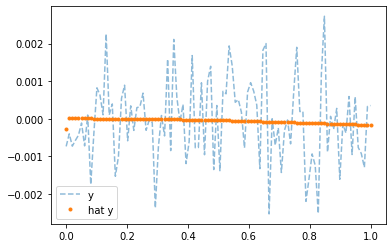

In [ ]:
plt.plot(_x,_y,"--",alpha=0.5)
plt.plot(_x,net4(_x),".")
plt.legend(["y","hat y"])

* 위와 같이 직선으로 추정된 것은 매우 잘 추정된 것이지만

* 만약 파란색 점선까지 정확히 추정하면 이느 에러텀까지 맞춘 과적합이다 이건 나중에 공부할 거얌

## 풀이 5 :  gradientTape

$$y= x+ 0.3 \varepsilon \quad x \leq 0$$

$$y =  3.5x + 0.3\varepsilon \quad x>0$$

* 예도 초깃값 비슷하게 잡아주면 가능

In [ ]:
tnp.random.seed(202150256)
N = 100
x = tnp.linspace(-1,1,N)
lamb  = lambda x : x + tnp.random.randn()*0.3 if x<=0 else 3.5*x + tnp.random.randn()*0.3
y = tnp.array(list(map(lamb,x)))

In [ ]:
_w0 = tf.Variable(0.5,dtype="float64")
_w1 = tf.Variable(0.5,dtype="float64")
_w2 = tf.Variable(0.5,dtype="float64")
_w3 = tf.Variable(3.0,dtype="float64")
_w4 = tf.Variable(0.5,dtype="float64")
_w5 = tf.Variable(3.0,dtype="float64")
_w6 = tf.Variable(0.5,dtype="float64")

In [ ]:
alpha= 0.01

In [ ]:
for  i in range(1000) : 
    with tf.GradientTape(persistent=True) as tape :
        y1 = tf.nn.relu(_w0 + _w1*x)
        y2 = tf.nn.relu(_w2 + _w3*x)
        _y1 = _w4*y1
        _y2 =  _w5*y2+_w6
        yhat = _y1+_y2
        loss = tf.reduce_mean((y-yhat)**2)
    slope0,slope1,slope2,slope3,slope4,slope5,slope6  = tape.gradient(loss,[_w0,_w1,_w2,_w3,_w4,_w5,_w6])
    _w0.assign_sub(alpha*slope0)
    _w1.assign_sub(alpha*slope1)
    _w2.assign_sub(alpha*slope2)
    _w3.assign_sub(alpha*slope3)
    _w4.assign_sub(alpha*slope4)
    _w5.assign_sub(alpha*slope5)
    _w6.assign_sub(alpha*slope6)

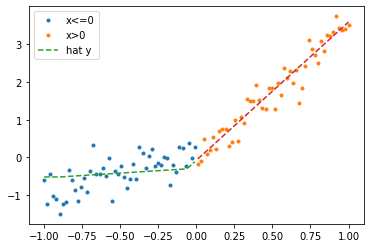

In [ ]:
plt.plot(x[x<=0],y[x<=0],".")
plt.plot(x[x>0],y[x>0],".")
plt.plot(x[x<=0],yhat[x<=0],"--")
plt.plot(x[x>0],yhat[x>0],"--")
plt.legend(["x<=0","x>0","hat y"])